# Example of Loading and pre-processing global precipitation data

#### Using Xarray and Iris for NetCDF data load and processing

### __Objective: To obtain time series of UK precipitation averages in boreal summer__

#### Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os

import iris

import iris.quickplot as qplt
import iris.coord_categorisation as coord_cat

import pandas as pd

import xarray as xr 

#### Set data path

In [25]:
# Put all raw input files (gridded daily precipitation) into the same folder (known as DATA_PATH).

DATA_PATH = 'path/to/inputs/'

#### Combine NetCDF files

In [26]:
# Load multiple raw input files of daily precipitation and print its metadata

# For latest version of xarray
precip_path = xr.open_mfdataset(DATA_PATH + '3B-DAY.MS.MRG.3IMERG.*.nc4', concat_dim="time")

# For older version of xarray
#precip_path = xr.open_mfdataset(DATA_PATH + '3B-DAY.MS.MRG.3IMERG.*.nc4', combine = 'by_coords', concat_dim="time")

print (precip_path)

<xarray.Dataset>
Dimensions:                    (lat: 1800, lon: 3600, nv: 2, time: 7153)
Coordinates:
  * lon                        (lon) float32 -179.9 -179.8 ... 179.9 179.9
  * lat                        (lat) float32 -89.95 -89.85 ... 89.85 89.95
  * time                       (time) object 2000-06-01 00:00:00 ... 2019-12-...
Dimensions without coordinates: nv
Data variables:
    precipitationCal           (time, lon, lat) float32 dask.array<chunksize=(1, 3600, 1800), meta=np.ndarray>
    precipitationCal_cnt       (time, lon, lat) int8 dask.array<chunksize=(1, 3600, 1800), meta=np.ndarray>
    precipitationCal_cnt_cond  (time, lon, lat) int8 dask.array<chunksize=(1, 3600, 1800), meta=np.ndarray>
    HQprecipitation            (time, lon, lat) float32 dask.array<chunksize=(1, 3600, 1800), meta=np.ndarray>
    HQprecipitation_cnt        (time, lon, lat) int8 dask.array<chunksize=(1, 3600, 1800), meta=np.ndarray>
    HQprecipitation_cnt_cond   (time, lon, lat) int8 dask.array<chunk

In [27]:
# Load Data Variable

precip = precip_path ['precipitationCal']
print (precip)

<xarray.DataArray 'precipitationCal' (time: 7153, lon: 3600, lat: 1800)>
dask.array<concatenate, shape=(7153, 3600, 1800), dtype=float32, chunksize=(1, 3600, 1800), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 179.9
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * time     (time) object 2000-06-01 00:00:00 ... 2019-12-31 00:00:00
Attributes:
    units:      mm
    long_name:  Daily accumulated precipitation (combined microwave-IR) estimate


#### Extract UK region (as specified by https://wiki.openstreetmap.org/wiki/User:Ewmjc/Country_bounds) 

In [28]:
lc = precip.coords["lon"]
la = precip.coords["lat"]

In [29]:
precip_UK = precip.loc[dict(lon=lc[(lc >= -13.65) & (lc <= 2.867)], lat=la[(la >= 49.867) & (la <= 61.5)])]
print (precip_UK)

<xarray.DataArray 'precipitationCal' (time: 7153, lon: 166, lat: 116)>
dask.array<getitem, shape=(7153, 166, 116), dtype=float32, chunksize=(1, 166, 116), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -13.65 -13.55 -13.45 -13.35 ... 2.55 2.65 2.75 2.85
  * lat      (lat) float32 49.95 50.05 50.15 50.25 ... 61.15 61.25 61.35 61.45
  * time     (time) object 2000-06-01 00:00:00 ... 2019-12-31 00:00:00
Attributes:
    units:      mm
    long_name:  Daily accumulated precipitation (combined microwave-IR) estimate


C:\Users\user\Anaconda3\lib\site-packages\xarray\core\indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [ ]:
# Merge datasets and combine into one NetCDF file (it takes some time, so we would like to see how it progresses)

In [30]:
from dask.diagnostics import ProgressBar

In [ ]:
time_to_netcdf = precip_UK.to_netcdf ('UK_precip.nc', compute = False)

with ProgressBar():
    results = time_to_netcdf.compute()

#### Load the NetCDF file and check the variables

In [60]:
precip_UK_path = iris.load('UK_precip.nc')
print (precip_UK_path[0])

Daily accumulated precipitation (combined microwave-IR) estimate / (mm) (time: 7153; longitude: 166; latitude: 116)
     Dimension coordinates:
          time                                                               x                -              -
          longitude                                                          -                x              -
          latitude                                                           -                -              x


C:\Users\user\Anaconda3\lib\site-packages\iris\fileformats\cf.py:367: UserWarning: Missing CF-netCDF boundary variable 'time_bnds', referenced by netCDF variable 'time'
  warnings.warn(message % (name, nc_var_name))


#### Load daily precipitation data into an Iris cube

In [61]:
precip_UK_path = os.path.join('UK_precip.nc')
print (precip_UK_path)
daily_precip = iris.load_cube(precip_UK_path, 'Daily accumulated precipitation (combined microwave-IR) estimate')
daily_precip.coord('latitude').guess_bounds()
daily_precip.coord('longitude').guess_bounds()

UK_precip.nc


C:\Users\user\Anaconda3\lib\site-packages\iris\fileformats\cf.py:367: UserWarning: Missing CF-netCDF boundary variable 'time_bnds', referenced by netCDF variable 'time'
  warnings.warn(message % (name, nc_var_name))


#### Plot some data

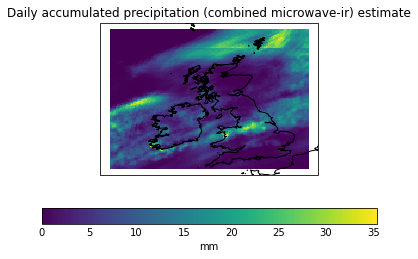

In [62]:
qplt.pcolormesh(daily_precip[0]) # plot the first time in the cube
plt.gca().coastlines()

#### Create seasonal means

In [63]:
coord_cat.add_season(daily_precip, 'time', name='clim_season')
coord_cat.add_season_year(daily_precip, 'time', name='season_year')

In [64]:
print (daily_precip)

Daily accumulated precipitation (combined microwave-IR) estimate / (mm) (time: 7153; longitude: 166; latitude: 116)
     Dimension coordinates:
          time                                                               x                -              -
          longitude                                                          -                x              -
          latitude                                                           -                -              x
     Auxiliary coordinates:
          clim_season                                                        x                -              -
          season_year                                                        x                -              -


In [65]:
# Aggregate by clim season and season year
annual_seasonal_mean_precip = daily_precip.aggregated_by(
    ['clim_season', 'season_year'],
    iris.analysis.MEAN)

#### Check this worked

In [66]:
for season, year in zip(
    annual_seasonal_mean_precip.coord('clim_season')[:10].points,
    annual_seasonal_mean_precip.coord('season_year')[:10].points):
    print(season + ' ' + str(year))

jja 2000
son 2000
djf 2001
mam 2001
jja 2001
son 2001
djf 2002
mam 2002
jja 2002
son 2002


#### Plot some data to check

Daily accumulated precipitation (combined microwave-IR) estimate / (mm) (time: 79; longitude: 166; latitude: 116)
     Dimension coordinates:
          time                                                               x              -              -
          longitude                                                          -              x              -
          latitude                                                           -              -              x
     Auxiliary coordinates:
          clim_season                                                        x              -              -
          season_year                                                        x              -              -
     Cell methods:
          mean: clim_season, season_year


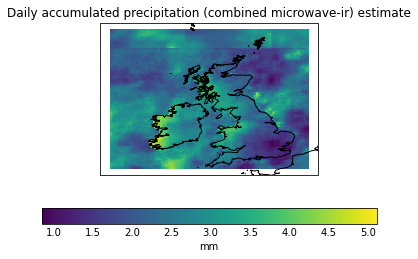

In [67]:
print(annual_seasonal_mean_precip)
qplt.pcolormesh(annual_seasonal_mean_precip[0]) # plot the rainfall in the first time step
plt.gca().coastlines()

#### Save to new NetCDF file

In [68]:
iris.save(annual_seasonal_mean_precip, 'UK_seasonal_precip.nc')

#### Load NetCDF 

In [69]:
UK_seasonal_precip_file = iris.load('UK_seasonal_precip.nc')
UK_seasonal_precip = UK_seasonal_precip_file[0]
print (UK_seasonal_precip)

Daily accumulated precipitation (combined microwave-IR) estimate / (mm) (time: 79; longitude: 166; latitude: 116)
     Dimension coordinates:
          time                                                               x              -              -
          longitude                                                          -              x              -
          latitude                                                           -              -              x
     Auxiliary coordinates:
          clim_season                                                        x              -              -
          season_year                                                        x              -              -
     Attributes:
          Conventions: CF-1.7
     Cell methods:
          mean: clim_season, season_year


#### Create area-averaged time series for UK precipitation

In [70]:
# Create area-weights array
grid_area_weights = iris.analysis.cartography.area_weights(UK_seasonal_precip)

# Perform the area-weighted mean using the computed grid-box areas.
UK_precip_mean = UK_seasonal_precip.collapsed(['latitude', 'longitude'],
                                iris.analysis.MEAN,
                                weights=grid_area_weights)

C:\Users\user\Anaconda3\lib\site-packages\iris\analysis\cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [71]:
# Extract JJA data and restrict to 2002 - 2019

jja_constraint = iris.Constraint(clim_season='jja')
year_constraint = iris.Constraint(season_year=lambda v: v > 2001 and v <= 2019 )

UK_precip_jja = UK_precip_mean.extract(jja_constraint & year_constraint)
print(UK_precip_jja)

Daily accumulated precipitation (combined microwave-IR) estimate / (mm) (time: 18)
     Dimension coordinates:
          time                                                               x
     Auxiliary coordinates:
          clim_season                                                        x
          season_year                                                        x
     Scalar coordinates:
          latitude: 55.700012 degrees, bound=(49.900013, 61.50001) degrees
          longitude: -5.3999968 degrees, bound=(-13.7, 2.900006) degrees
     Attributes:
          Conventions: CF-1.7
     Cell methods:
          mean: clim_season, season_year
          mean: latitude, longitude


Text(0.5, 1.0, 'UK JJA Precip')

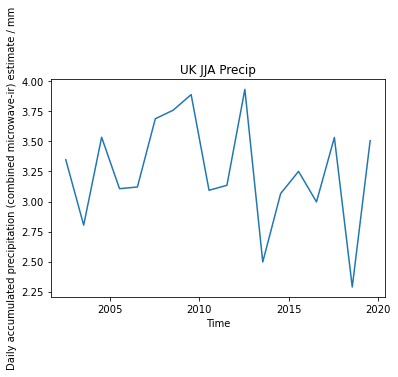

In [72]:
qplt.plot(UK_precip_jja)
plt.title('UK JJA Precip')

In [73]:
iris.save(UK_precip_jja, 'UK_precip_mean.nc')